<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/week-Apr.-3/MidCourseProjectBreakoutRoom3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv"

In [ ]:
import pandas as pd
AirbnbData = pd.read_csv(url,sep=",")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
AirbnbData.sample(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24867,19944880,The Bedford,5350896,Zaher,Brooklyn,Williamsburg,40.71312,-73.96170,Entire home/apt,175,3,30,2019-06-25,1.28,1,24
16697,13358067,bright 1 bedroom by the park,7097844,Anne,Brooklyn,Greenpoint,40.72552,-73.94489,Entire home/apt,114,2,3,2018-09-11,0.08,1,0
37024,29435528,Single cozy room in Manhattan's Upper West Side,39481825,Ami,Manhattan,Morningside Heights,40.80559,-73.96606,Private room,70,1,15,2019-07-02,1.77,1,16
10663,8195719,Luxury Apartment in Williamsburg Br,24128401,Yonatan,Brooklyn,Williamsburg,40.71387,-73.95697,Entire home/apt,190,13,1,2015-10-11,0.02,1,0
9255,7073418,Mod Glamor in Bed-Stuy Garden Flat,4582256,Consuelo,Brooklyn,Bedford-Stuyvesant,40.68297,-73.93804,Entire home/apt,250,2,3,2015-10-20,0.06,1,0
31277,24287261,Sweet Spot In Manhattan NYC!,16574437,Lee,Manhattan,Harlem,40.81542,-73.94574,Entire home/apt,175,2,29,2019-07-01,1.92,1,190
42980,33373366,Full Private Studio - No Roommate Hassle,251418685,Liz,Manhattan,Midtown,40.75310,-73.96986,Entire home/apt,130,4,2,2019-04-21,0.75,1,63
43494,33686419,Prime Williamsburg 2BR w/ NYC View -Long Term ...,82742663,Scott,Brooklyn,Williamsburg,40.71948,-73.96376,Entire home/apt,150,30,1,2019-04-29,0.42,1,160
48271,36172519,"Cozy, Spacious and private apartment in NYC",219573002,Camille,Manhattan,Washington Heights,40.85488,-73.93194,Entire home/apt,125,2,0,NaN,NaN,1,2
41196,32044146,Charming Apartment in Greenpoint,138150256,Alejandro,Brooklyn,Greenpoint,40.73324,-73.95304,Entire home/apt,110,7,1,2019-05-26,0.68,2,23


In [ ]:
AirbnbData_subset=AirbnbData[['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [ ]:
AirbnbData_subset.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [ ]:
AirbnbData_subset.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In [ ]:
AirbnbData_subset = AirbnbData_subset.fillna(0)

In [ ]:
# Converting each of the columns to scaled version
#bankData['ageScaled'] = rob_scaler.fit_transform(bankData['age'].values.reshape(-1,1))
#bankData['balScaled'] = rob_scaler.fit_transform(bankData['balance'].values.reshape(-1,1))
#bankData['durScaled'] = rob_scaler.fit_transform(bankData['duration'].values.reshape(-1,1))

In [ ]:
# Dropping the original columns
#bankData.drop(['age','balance','duration'], axis=1, inplace=True)

In [ ]:
#bankData.head()

In [ ]:
AirbnbData_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_avg                       48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
price_average = AirbnbData_subset.price.mean()

In [ ]:
AirbnbData_subset['above_avg'] = [1 if x > price_average else 0 for x in AirbnbData_subset['price']]

In [ ]:
#AirbnbData_subset_cat = pd.get_dummies(AirbnbData_subset[['room_type','neighbourhood_group','above_avg']])

In [ ]:
AirbnbData_subset_cat = pd.get_dummies(AirbnbData_subset[['room_type','neighbourhood_group']])

In [ ]:
#AirbnbData_subset_num = pd.get_dummies(AirbnbData_subset[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']])

In [ ]:
AirbnbData_subset_num = pd.get_dummies(AirbnbData_subset[['latitude','longitude','minimum_nights','reviews_per_month','calculated_host_listings_count','availability_365']])

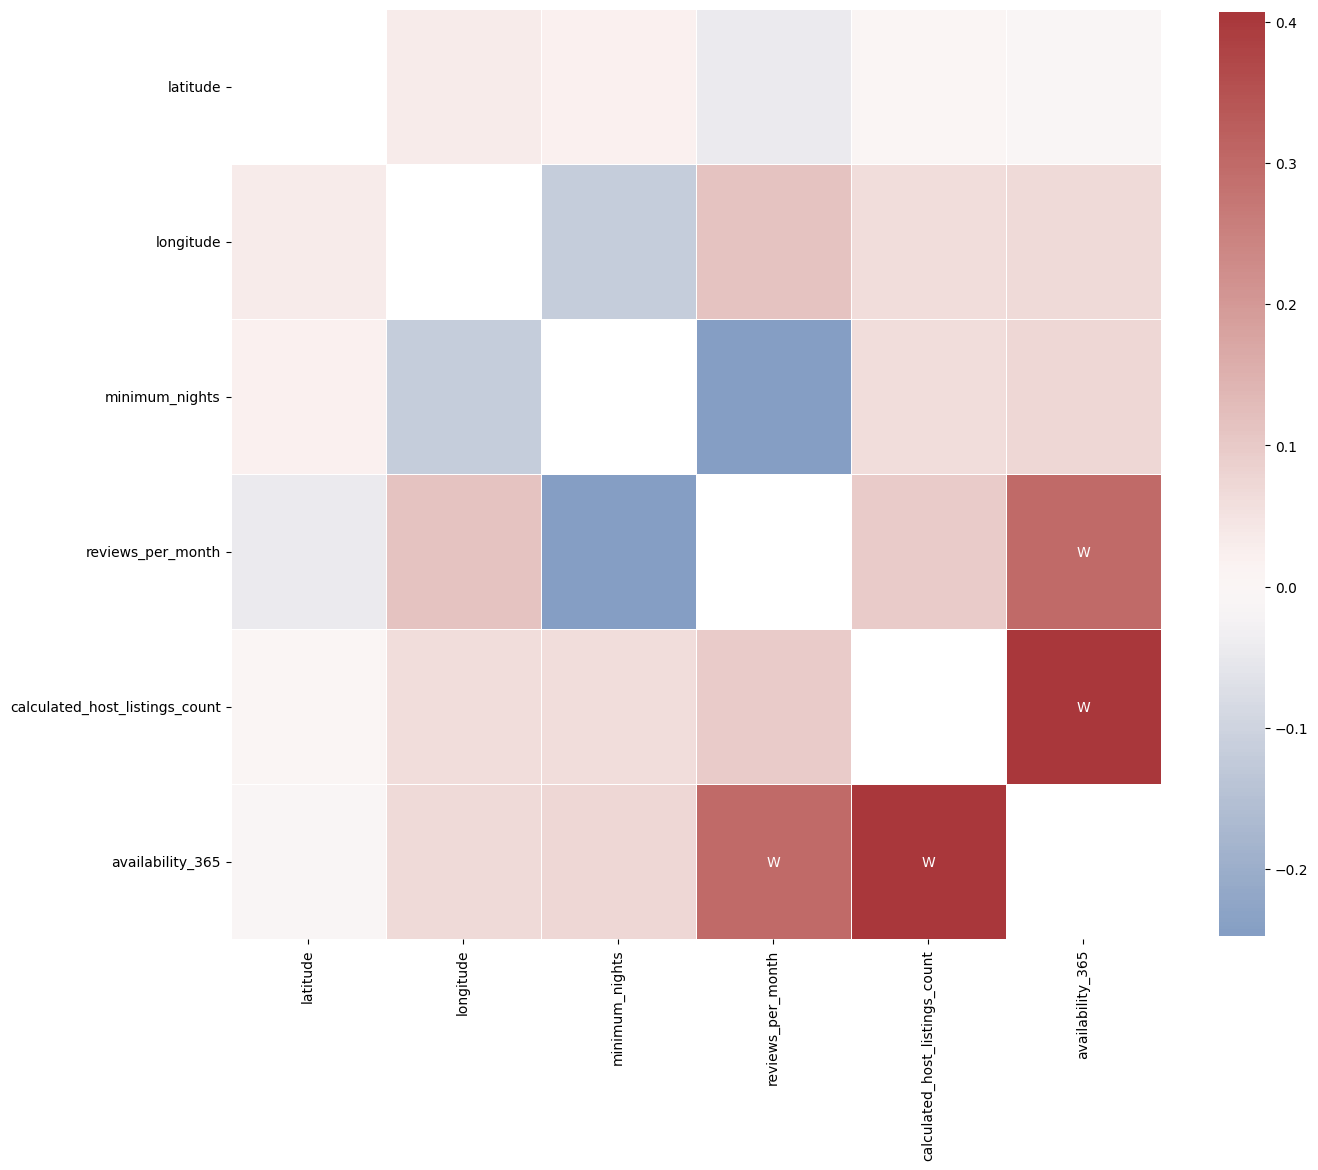

In [ ]:
df_corr = AirbnbData_subset_num.corr(method="spearman") # pearson assumes a linear relationship... spearman does not
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))
# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [ ]:
AirbnbData_subset_num.corr

<bound method DataFrame.corr of        latitude  longitude  minimum_nights  reviews_per_month  \
0      40.64749  -73.97237               1               0.21   
1      40.75362  -73.98377               1               0.38   
2      40.80902  -73.94190               3               0.00   
3      40.68514  -73.95976               1               4.64   
4      40.79851  -73.94399              10               0.10   
...         ...        ...             ...                ...   
48890  40.67853  -73.94995               2               0.00   
48891  40.70184  -73.93317               4               0.00   
48892  40.81475  -73.94867              10               0.00   
48893  40.75751  -73.99112               1               0.00   
48894  40.76404  -73.98933               7               0.00   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2            

In [ ]:
#bankNum = bankData[['ageScaled','balScaled','day','durScaled','campaign','pdays','previous']]

In [ ]:
AirbnbData_subset.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_avg
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365,0
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355,1
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,0.00,1,365,0
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194,0
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0,0


In [ ]:
AirbnbData_subset.above_avg.value_counts()

0    34016
1    14879
Name: above_avg, dtype: int64

In [ ]:
# Merging with the original data frame
# Preparing the X variables
X = pd.concat([AirbnbData_subset_cat, AirbnbData_subset_num], axis=1)
print(X.shape)
# Preparing the Y variable
Y = AirbnbData_subset['above_avg']
print(Y.shape)
X.head()

(48895, 14)
(48895,)


,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,latitude,longitude,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
0,0,1,0,0,1,0,0,0,40.64749,-73.97237,1,0.21,6,365
1,1,0,0,0,0,1,0,0,40.75362,-73.98377,1,0.38,2,355
2,0,1,0,0,0,1,0,0,40.80902,-73.94190,3,0.00,1,365
3,1,0,0,0,1,0,0,0,40.68514,-73.95976,1,4.64,1,194
4,1,0,0,0,0,1,0,0,40.79851,-73.94399,10,0.10,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Defining the LogisticRegression function
AirbnbModel = LogisticRegression(max_iter=100)

In [ ]:
#train_data, test_data = train_test_split(AirbnbData_subset, test_size=0.2, random_state=42)

In [ ]:
AirbnbModel.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = AirbnbModel.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(AirbnbModel.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.79


In [ ]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[5853  998]
 [1039 1889]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6851
           1       0.65      0.65      0.65      2928

    accuracy                           0.79      9779
   macro avg       0.75      0.75      0.75      9779
weighted avg       0.79      0.79      0.79      9779



In [ ]:
print('Percentage of negative class :',(y_train[y_train=='yes'].value_counts()/len(y_train) ) * 100)
print('Percentage of positive class :',(y_train[y_train=='no'].value_counts()/len(y_train) ) * 100)

Percentage of negative class : Series([], Name: above_avg, dtype: float64)
Percentage of positive class : Series([], Name: above_avg, dtype: float64)


In [ ]:
# Collect more data
# Resample the data
# --- Undersample (make the dataset the same size as the minority class (11%))
# --- Oversample (create "fake" data points so that the minority class equals the majority class)
# --- Modified (take the majority and drop it in half and we take the minority and we increase to the halfway point)

In [ ]:
# Random Undersampling
# Let us first join the train_x and train_y for ease of operation
trainData = pd.concat([X_train,y_train],axis=1)

In [ ]:
trainData.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,latitude,longitude,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,above_avg
32645,1,0,0,0,1,0,0,0,40.71577,-73.95530,3,0.87,1,1,1
23615,0,1,0,0,0,1,0,0,40.84917,-73.94048,2,0.16,1,0,0
31183,0,1,0,0,1,0,0,0,40.68993,-73.95947,2,0.00,2,0,0
29260,1,0,0,0,1,0,0,0,40.68427,-73.93118,3,4.91,1,267,0
7275,0,1,0,0,0,0,1,0,40.74705,-73.89564,5,0.25,1,0,0


In [ ]:
trainData.above_avg.nunique()

2

In [ ]:
# pull out all of the "yes" or minority values
ind = trainData[trainData['above_avg']==1].index
print(len(ind))

11951


In [ ]:
# Separate the minority class
minData = trainData.loc[ind]
print(minData.shape)

(11951, 15)


In [ ]:
# now the majority
ind1 = trainData[trainData['above_avg']==0].index
print(len(ind1))

27165


In [ ]:
# Separate the majority class
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

(27165, 15)


,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,latitude,longitude,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,above_avg
23615,0,1,0,0,0,1,0,0,40.84917,-73.94048,2,0.16,1,0,0
31183,0,1,0,0,1,0,0,0,40.68993,-73.95947,2,0.00,2,0,0
29260,1,0,0,0,1,0,0,0,40.68427,-73.93118,3,4.91,1,267,0
7275,0,1,0,0,0,0,1,0,40.74705,-73.89564,5,0.25,1,0,0
26011,1,0,0,0,0,1,0,0,40.76354,-73.99283,30,0.21,31,270,0


In [ ]:
majSample=majData.sample(n=len(ind),random_state=123)

In [ ]:
print(majSample.shape)
majSample.head()

(11951, 15)


,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,latitude,longitude,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,above_avg
44170,0,1,0,0,1,0,0,0,40.65226,-73.94521,7,0.98,9,131,0
1110,0,1,0,0,0,1,0,0,40.80661,-73.95760,28,0.81,1,80,0
22643,0,1,0,0,0,0,1,0,40.70442,-73.89602,2,1.11,1,0,0
7816,0,1,0,0,0,1,0,0,40.79788,-73.96180,7,0.02,1,0,0
22843,0,1,0,0,1,0,0,0,40.68144,-73.93429,5,0.90,1,340,0


In [ ]:
# Concatenating both data sets and then shuffling the data set
balData = pd.concat([minData,majSample],axis = 0)

In [ ]:
# Shuffling the data set
from sklearn.utils import shuffle
balData = shuffle(balData)
balData.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,latitude,longitude,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,above_avg
44775,1,0,0,0,1,0,0,0,40.66329,-73.98527,3,4.86,1,45,0
6264,1,0,0,0,1,0,0,0,40.68711,-73.87336,3,2.02,1,18,0
5764,1,0,0,0,0,1,0,0,40.70956,-74.01341,7,0.05,1,0,1
7260,1,0,0,0,1,0,0,0,40.70430,-73.98667,2,3.33,2,235,1
26552,1,0,0,0,0,1,0,0,40.77538,-73.98814,30,0.38,25,313,1


In [ ]:

balData.shape

(23902, 15)

In [ ]:
# Making the new X_train and y_train
X_trainNew = balData.iloc[:,0:14]
print(X_trainNew.head())
y_trainNew = balData['above_avg']
print(y_trainNew.head())

       room_type_Entire home/apt  room_type_Private room  \
44775                          1                       0   
6264                           1                       0   
5764                           1                       0   
7260                           1                       0   
26552                          1                       0   

       room_type_Shared room  neighbourhood_group_Bronx  \
44775                      0                          0   
6264                       0                          0   
5764                       0                          0   
7260                       0                          0   
26552                      0                          0   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
44775                             1                              0   
6264                              1                              0   
5764                              0                              1   
7260

In [ ]:
from sklearn.linear_model import LogisticRegression
AirbnbModel1 = LogisticRegression()
AirbnbModel1.fit(X_trainNew, y_trainNew)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = AirbnbModel1.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set for balanced data set: {:.2f}'.format(AirbnbModel1.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set for balanced data set: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[4842 2009]
 [ 414 2514]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      6851
           1       0.56      0.86      0.67      2928

    accuracy                           0.75      9779
   macro avg       0.74      0.78      0.74      9779
weighted avg       0.81      0.75      0.76      9779



In [ ]:
# Oversampling
!pip install smote-variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.4/407.4 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=c2f7cf91beede83b1d453ffbfebfd4e69aae9b1735d36946fbe4a7529b6c7660
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7453 sha256=3d3c764d2a56e50b1e54696664cc5461e664a4cfb9aa094fb07ff76f0b484645
  Stored in directory: /root/.cache/pip/wheels/26/3c/70/9467407f3aa90862061eadcd286627b23a8bab6789b667776f
Successfully built minisom statistics


In [ ]:
# Shape before oversampling
print("Before OverSampling count of yes: {}".format(sum(y_train==1)))
print("Before OverSampling count of no: {} \n".format(sum(y_train==0)))

Before OverSampling count of yes: 11951
Before OverSampling count of no: 27165 



In [ ]:
import smote_variants as sv
import numpy as np

In [ ]:
# Instantiating the SMOTE class
oversampler= sv.SMOTE()

In [ ]:
# Creating new training set
X_train_os, y_train_os = oversampler.sample(np.array(X_train), np.array(y_train))

2023-04-03 15:31:39,698:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-04-03 15:31:39,709:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-04-03 15:31:39,739:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-04-03 15:31:40,006:INFO:SMOTE: simplex sampl

In [ ]:
# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape))
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_os==1)))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_os==0)))

After OverSampling, the shape of train_X: (54330, 14)
After OverSampling, the shape of train_y: (54330,) 

After OverSampling, counts of label 'Yes': 27165
After OverSampling, counts of label 'no': 27165


In [ ]:
# Training the model with Logistic regression model
from sklearn.linear_model import LogisticRegression
AirbnbModel2 = LogisticRegression()
AirbnbModel2.fit(X_train_os, y_train_os)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = AirbnbModel2.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print('Accuracy of Logistic regression model prediction on test set for Smote balanced data set: {:.2f}'.format(AirbnbModel2.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set for Smote balanced data set: 0.75


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[4879 1972]
 [ 430 2498]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      6851
           1       0.56      0.85      0.68      2928

    accuracy                           0.75      9779
   macro avg       0.74      0.78      0.74      9779
weighted avg       0.81      0.75      0.76      9779

